<a href="https://colab.research.google.com/github/karthik-0802/MSDA/blob/main/assignment_6_mk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6. In this exercise, you will further analyze the Wage data set considered
throughout this chapter.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import f_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

%matplotlib inline

wage=pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv")
wage.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


(a) Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree d  for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial ft to the data.

In [ ]:
np.random.seed(10)

In [ ]:
# Model variables
y = wage['wage']  # Assuming 'data' contains both 'age' and 'wage'
X = wage[['age']]  # Use double brackets to keep X as DataFrame

scores = []
for i in range(11):  # range(11) will iterate from 0 to 10
    model = Pipeline([('poly', PolynomialFeatures(degree=i)), ('linear', LinearRegression())])
    model.fit(X, y)

    score = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # Negative sign to make it positive
    scores.append(np.mean(score))

scores = np.array(scores)  # Convert scores to numpy array for better handling

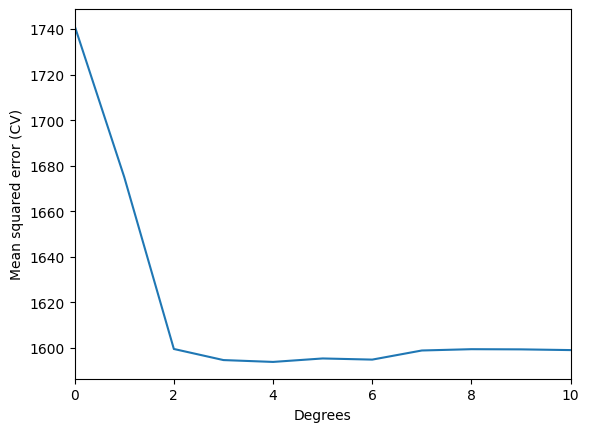

In [ ]:
# Plot errors
x_plot = np.arange(0,11)

plt.plot(x_plot, scores)
plt.ylabel('Mean squared error (CV)')
plt.xlabel('Degrees')
plt.xlim(0,10)
plt.show()



optimal degree d for the polynomial

In [ ]:
print(np.where(scores == np.min(scores)))

(array([4]),)


Using cross-validation for selecting optimal degree d for the polynomial that is 4.

hypothesis testing using ANOVA:

In [ ]:
# Fitting polynomial models:
models=[]
for i in range(0,11):
    poly = PolynomialFeatures(degree=i)
    X_pol = poly.fit_transform(X)
    model = sm.GLS(y, X_pol).fit()
    models.append(model)

In [ ]:
sm.stats.anova_lm(models[0], models[1], models[2], models[3], models[4], models[5], models[6], typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2999.0,5.222086e+06,0.0,NaN,NaN,NaN
1,2998.0,5.022216e+06,1.0,199869.664970,125.505882,1.444930e-28
2,2997.0,4.793430e+06,1.0,228786.010128,143.663571,2.285169e-32
3,2996.0,4.777674e+06,1.0,15755.693664,9.893609,1.674794e-03
4,2995.0,4.771604e+06,1.0,6070.152124,3.811683,5.098933e-02
5,2994.0,4.770322e+06,1.0,1282.563017,0.805371,3.695646e-01
6,2993.0,4.766389e+06,1.0,3932.257631,2.469216,1.162015e-01


The coefficients' significance declines in tandem with the F values. Furthermore, there is no discernible gain when the degrees of the polynomial regression model are increased above 4. These results are consistent with cross-validation results.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


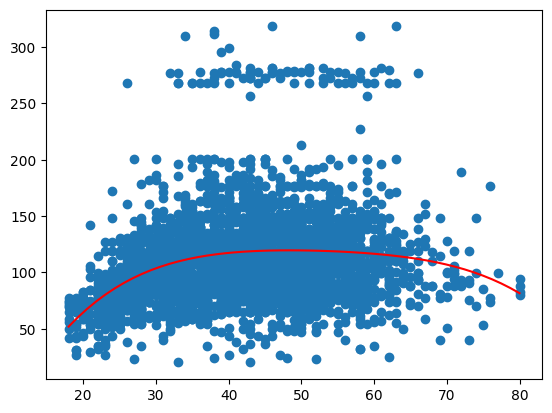

In [ ]:
opt_degree = 4 # storing the optimal degree for further use in PolynomialFeatures and plot the polynomial regression:

model = Pipeline([('poly', PolynomialFeatures(degree = opt_degree)), ('linear', LinearRegression())])
model.fit(X,y)

X_lin = np.linspace(18,80)[:,np.newaxis]
y_lin = model.predict(X_lin)

plt.scatter(X,y)
plt.plot(X_lin, y_lin,'-r');

(b) Fit a step function to predict wage using age, and perform crossvalidation
to choose the optimal number of cuts. Make a plot of
the fit obtained.

In [ ]:
scores = []
for i in range(1,10):
    age_groups = pd.cut(wage['age'], i)
    df_dummies = pd.get_dummies(age_groups)

    X_cv = df_dummies
    y_cv = wage['wage']

    model.fit(X_cv, y_cv)
    score = cross_val_score(model, X_cv, y_cv, cv=5, scoring='neg_mean_squared_error')
    scores.append(score)

scores = np.abs(scores)

In [ ]:
# Number of cuts that minimize the error
min_scores = []
for i in range(0,9):
    min_score = np.mean(scores[i,:])
    min_scores.append(min_score)

    print('Number of cuts: %i, error %.3f' % (i+1, min_score))

Number of cuts: 1, error 1741.335
Number of cuts: 2, error 1733.653
Number of cuts: 3, error 1683.825
Number of cuts: 4, error 1635.174
Number of cuts: 5, error 1633.725
Number of cuts: 6, error 1629.467
Number of cuts: 7, error 1612.398
Number of cuts: 8, error 1614.802
Number of cuts: 9, error 1616.425


The number of cuts that minimize the error is : 1612.398

In [ ]:
# Convert ages to groups of age ranges
n_groups = 8
age_groups = pd.cut(wage['age'], n_groups)
age_dummies = pd.get_dummies(age_groups)
# Add wage to the dummy dataset.
df_step = age_dummies.join(wage['wage'])

In [ ]:
df_step.head()

,"(17.938, 25.75]","(25.75, 33.5]","(33.5, 41.25]","(41.25, 49.0]","(49.0, 56.75]","(56.75, 64.5]","(64.5, 72.25]","(72.25, 80.0]",wage
0,True,False,False,False,False,False,False,False,75.043154
1,True,False,False,False,False,False,False,False,70.476020
2,False,False,False,True,False,False,False,False,130.982177
3,False,False,False,True,False,False,False,False,154.685293
4,False,False,False,False,True,False,False,False,75.043154


In [ ]:
X_step = df_step.iloc[:,:-1]
y_step = df_step.iloc[:,-1]

In [ ]:
reg = sm.GLM(y_step, X_step).fit()

In [ ]:
X_aux = np.linspace(18,80)
groups_aux = pd.cut(X_aux, n_groups)
aux_dummies = pd.get_dummies(groups_aux)

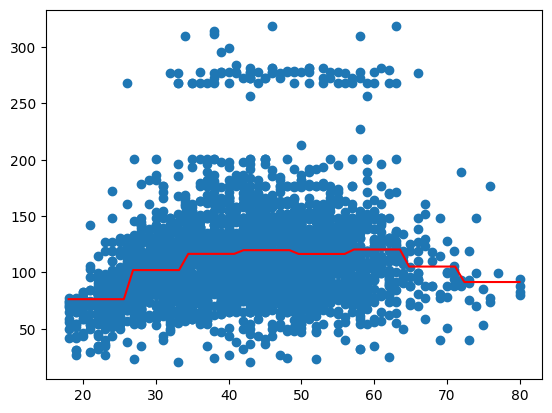

In [ ]:
# Plot step function
X_step_lin = np.linspace(18,80)
y_lin = reg.predict(aux_dummies)

plt.scatter(X,y)
plt.plot(X_step_lin, y_lin,'-r');

10. This question relates to the College data set.

In [ ]:
df = pd.read_csv('https://www.statlearning.com/s/College.csv', index_col=0)

# Dummy variables
# The feature 'Private' is categorical. In order to use it in our models, we need to use dummy variables.
df = pd.get_dummies(df)
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_No,Private_Yes
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False,True
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False,True
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False,True
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,False,True
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,False,True


(a) Split the data into a training set and a test set. Using out-of-state
tuition as the response and the other variables as the predictors,
perform forward stepwise selection on the training set in order
to identify a satisfactory model that uses just a subset of the
predictors.

In [ ]:
# Dataset
X = df.drop(['Outstate'], axis=1)
y = df['Outstate']

# Split into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


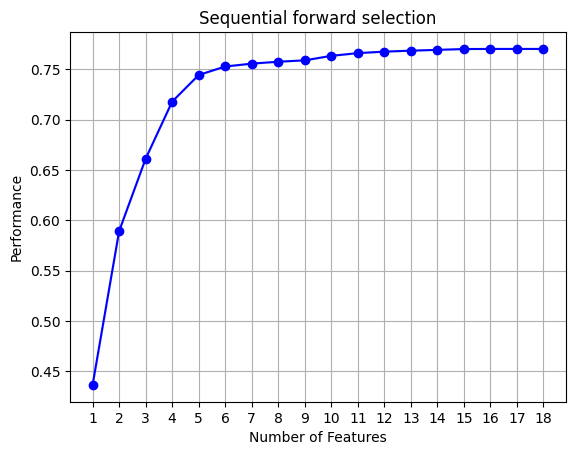

In [ ]:
# Forward stepwise selection
lr = LinearRegression()

sfs = SFS(lr,
          k_features = 18,  # We have 18 features
          forward = True,
          floating = False,
          scoring = 'r2',
          cv = 0)

sfs = sfs.fit(X_train, y_train)  # as_matrix() to be readable by sfs

fig = plot_sfs(sfs.get_metric_dict())

#plt.title('Sequential forward selection (w. StdDev)')
plt.title('Sequential forward selection')
plt.grid()
plt.show()

We'll choose to use six features. Adding more features above this point is not expected to result in appreciable performance gains, as the graph illustrates.


In [ ]:
# Visualizing the results in dataframes
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(7,)",[0.4362198079356785],0.43622,"(Room.Board,)",NaN,0.0,NaN
2,"(7, 13)",[0.5892065138987024],0.589207,"(Room.Board, perc.alumni)",NaN,0.0,NaN
3,"(7, 13, 14)",[0.66124161844549],0.661242,"(Room.Board, perc.alumni, Expend)",NaN,0.0,NaN
4,"(7, 13, 14, 16)",[0.7180472594803899],0.718047,"(Room.Board, perc.alumni, Expend, Private_No)",NaN,0.0,NaN
5,"(7, 10, 13, 14, 16)",[0.7445389170091502],0.744539,"(Room.Board, PhD, perc.alumni, Expend, Private...",NaN,0.0,NaN
6,"(7, 10, 13, 14, 15, 16)",[0.7529797180569529],0.75298,"(Room.Board, PhD, perc.alumni, Expend, Grad.Ra...",NaN,0.0,NaN
7,"(7, 9, 10, 13, 14, 15, 16)",[0.7558186916454233],0.755819,"(Room.Board, Personal, PhD, perc.alumni, Expen...",NaN,0.0,NaN
8,"(4, 7, 9, 10, 13, 14, 15, 16)",[0.7577507694491248],0.757751,"(Top25perc, Room.Board, Personal, PhD, perc.al...",NaN,0.0,NaN
9,"(1, 4, 7, 9, 10, 13, 14, 15, 16)",[0.7590884961181228],0.759088,"(Accept, Top25perc, Room.Board, Personal, PhD,...",NaN,0.0,NaN
10,"(0, 1, 4, 7, 9, 10, 13, 14, 15, 16)",[0.7635928325779913],0.763593,"(Apps, Accept, Top25perc, Room.Board, Personal...",NaN,0.0,NaN


In [ ]:
# Variables that we will choose
print('Variables: %s, %s, %s, %s, %s, %s' % (X.columns[16], X.columns[7], X.columns[10], X.columns[13], X.columns[14], X.columns[15]))

Variables: Private_No, Room.Board, PhD, perc.alumni, Expend, Grad.Rate


In [ ]:
selected_features = ["Private_No", "Room.Board", "PhD", "perc.alumni", "Expend", "Grad.Rate"]
selected_features

['Private_No', 'Room.Board', 'PhD', 'perc.alumni', 'Expend', 'Grad.Rate']

(b) Fit a GAM on the training data, using out-of-state tuition as
the response and the features selected in the previous step as
the predictors. Plot the results, and explain your findings.

In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

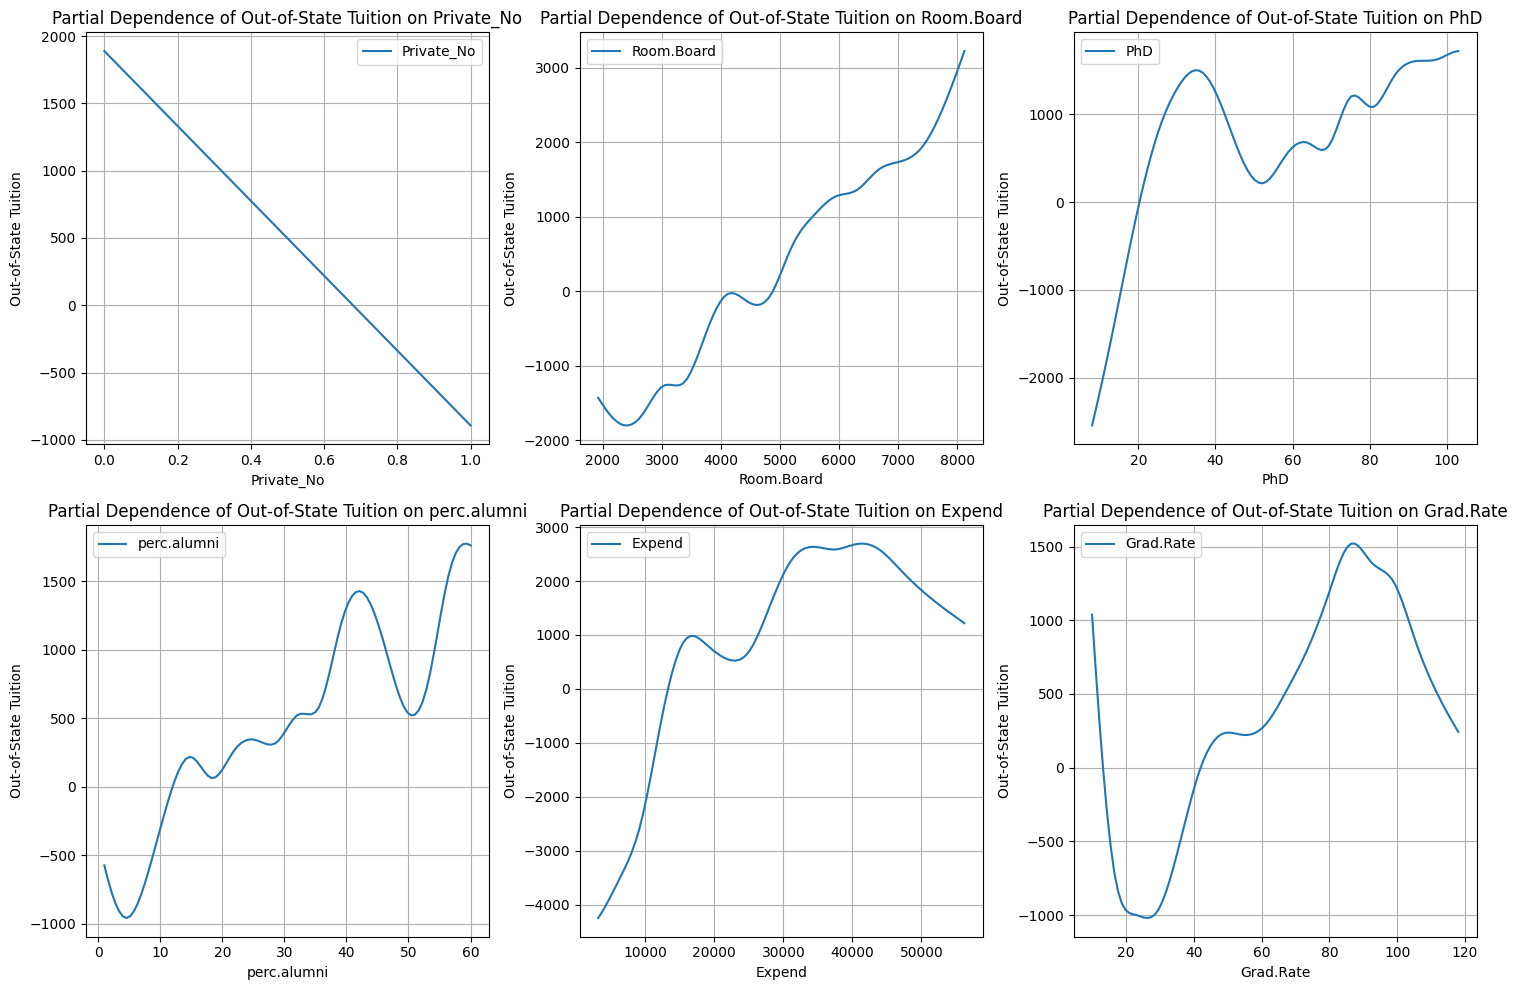

In [ ]:
from pygam import LinearGAM, s, f, l

# Fit GAM model
gam = LinearGAM().fit(X_train_selected, y_train)

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    XX = gam.generate_X_grid(term=i)
    partial_dep = gam.partial_dependence(term=i, X=XX)
    plt.plot(XX[:, i], partial_dep, label=feature)
    plt.title("Partial Dependence of Out-of-State Tuition on {}".format(feature))
    plt.xlabel(feature)
    plt.ylabel("Out-of-State Tuition")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     53.5653
Link Function:                     IdentityLink Log Likelihood:                                 -8679.2047
Number of Samples:                          543 AIC:                                            17467.5399
                                                AICc:                                           17479.9803
                                                GCV:                                          4232277.0771
                                                Scale:                                        3488086.0916
                                                Pseudo R-Squared:                                   0.8034
Feature Function                  Lam

<ipython-input-29-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


Higher out-of-state tuition costs are generally associated with private colleges; this is a result of a number of factors, including boarding room availability, graduation rates, alumni percentages, and the availability of Ph.D. programs. On the other hand, individual characteristics often result in a drop in tuition fees. There is a sharp rise in expenditure at first, which is followed by a slowdown and a small decline.


(c) Evaluate the model obtained on the test set, and explain the
results obtained.

In [ ]:
# Evaluating the model on the test dataset
test_score = gam.score(X_test_selected, y_test)
print("Test Set R^2 Score:", test_score)

Test Set R^2 Score: 0.7896781388844216


Our investigation yielded six important variables that together account for the variation in out-of-state tuition costs. The % of alumni donors ('perc.alumni'), the price of boarding rooms ('Room.Board'), the graduation rate ('Grad.Rate'), the number of Ph.D. faculty members ('PhD'), and the private status of the university ('Private_No') are some of these predictors.

Our Generalized Additive Model (GAM) obtained an approximate Test Set R^2 Score of 0.789 with these six predictors. This suggests that around 78.96% of the variation in out-of-state tuition expenses may be satisfactorily explained by our model. With a high R^2 value, the variables chosen offer significant insights into the factors influencing out-of-state tuition costs.


(d) For which variables, if any, is there evidence of a non-linear
relationship with the response?

You can review the partial dependence charts from Part (b), which show any possible non-linear correlations between the response variable and the predictors. More specifically, non-linearity in the curves shown in these charts indicates the possibility of non-linear interactions between the predictors and the response variable.

Additionally, the GAM model summary offers more proof in favor of this idea. The data suggests that there is a non-linear partial dependence between "out-of-state tuition," "perc.alumni," and "graduation rate." This suggests that the link between these variables is not linear and is not constant. Furthermore, a substantial nonlinear correlation between "spending" and "out-of-state" tuition is highlighted in the GAM model summary.

